In [21]:
import matplotlib.pyplot as plt
import pygmo as pg

from spineq.data.census import PopulationDataset, WorkplaceDataset
from spineq.data.group import LocalAuthority
from spineq.mappings import lad20nm_to_lad20cd
from spineq.opt.coverage import ExponentialCoverage
from spineq.opt.objectives import Column, Objectives
from spineq.opt.pygmo import PyGMO
from spineq.plot.plotting import networks_parallel_coords_plot, networks_swarmplot

In [2]:
lad20nm = "Newcastle upon Tyne"
lad20cd = lad20nm_to_lad20cd(lad20nm)

n_sensors = 20
theta = 500

child_age = 16
elder_age = 65

## Workers and Older Adults

In [3]:
total = PopulationDataset(lad20cd).to_total()
child = (
    PopulationDataset(lad20cd).filter_age(high=child_age, name="children").to_total()
)
elder = PopulationDataset(lad20cd).filter_age(low=elder_age, name="elderly").to_total()
work = WorkplaceDataset(lad20cd)
la = LocalAuthority(lad20cd, datasets=[total, child, elder, work])

cov = ExponentialCoverage.from_la(la, theta)

objs = Objectives(
    la,
    [Column(elder.name, "total"), Column(work.name, "workers")],
    cov,
)

## PyGMO Multi-Objective Problem

- One decision variable for each sensor to be placed, variable value is index of location
- One objective per separate weight group defined above, e.g. total population, children, elderly and workplace.

## NSGA2

In [4]:
# Create algorithm to solve problem with
algo = pg.nsga2(gen=1000)
opt = PyGMO(algo, population_size=100)

In [5]:
result = opt.run(objs, n_sensors)


   Gen:        Fevals:        ideal1:        ideal2:
      1              0       -0.26472      -0.339435
      2            100      -0.267909      -0.339435
      3            200      -0.267909      -0.358934
      4            300      -0.271216      -0.383346
      5            400      -0.279643      -0.383346
      6            500      -0.283355      -0.390919
      7            600      -0.283953      -0.403962
      8            700      -0.283953      -0.403962
      9            800      -0.283953      -0.445327
     10            900      -0.286143      -0.445327
     11           1000      -0.286271      -0.445327
     12           1100      -0.286271      -0.445327
     13           1200      -0.289592      -0.446606
     14           1300       -0.29032      -0.458153
     15           1400      -0.290709      -0.458153
     16           1500      -0.290709      -0.458153
     17           1600      -0.290709       -0.45832
     18           1700      -0.294147      -0

    303          30200      -0.318537      -0.512356
    304          30300      -0.318537      -0.512356
    305          30400      -0.318537      -0.512356
    306          30500      -0.318537      -0.512356
    307          30600      -0.318537      -0.512356
    308          30700      -0.318537      -0.512356
    309          30800      -0.318537      -0.512356
    310          30900      -0.318537      -0.512356
    311          31000      -0.318873      -0.512356
    312          31100      -0.318873      -0.512356
    313          31200      -0.318873      -0.512356
    314          31300      -0.318873      -0.512356
    315          31400      -0.318873      -0.512356
    316          31500      -0.318873      -0.512356
    317          31600      -0.318873      -0.512356
    318          31700      -0.318873      -0.512356
    319          31800      -0.318873      -0.512356
    320          31900      -0.318873      -0.512356
    321          32000      -0.318873      -0.

    606          60500      -0.324176      -0.520053
    607          60600      -0.324176      -0.520053
    608          60700      -0.324176      -0.520053
    609          60800      -0.324176      -0.520053
    610          60900      -0.324176      -0.520053
    611          61000      -0.324176      -0.520053
    612          61100      -0.324176      -0.520053
    613          61200      -0.324176      -0.520053
    614          61300      -0.324176      -0.520053
    615          61400      -0.324176      -0.520053
    616          61500      -0.324176      -0.520053
    617          61600      -0.324176      -0.520053
    618          61700      -0.324176      -0.520053
    619          61800      -0.324176      -0.520053
    620          61900      -0.324176      -0.520053
    621          62000      -0.324176      -0.520053
    622          62100      -0.324176      -0.520053
    623          62200      -0.324176      -0.520053
    624          62300      -0.324176      -0.

Text(0, 0.5, 'elderly_total')

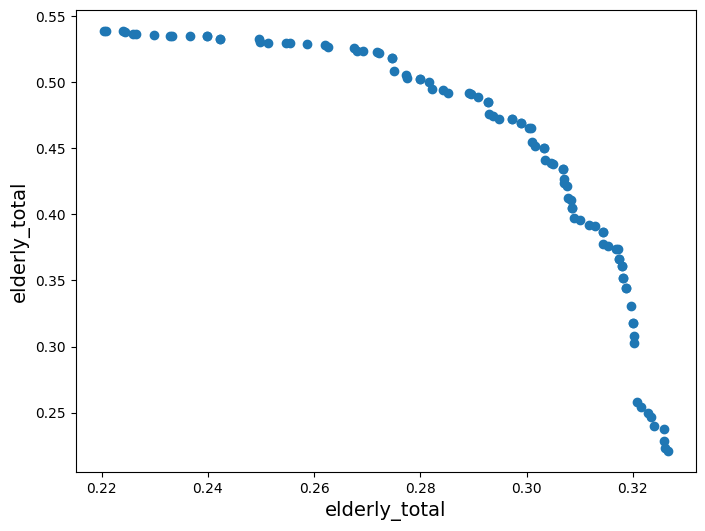

In [6]:
# plot fitness values for first two objectives
plt.figure(figsize=(8, 6))
plt.plot(result.total_coverage[:, 0], result.total_coverage[:, 1], "o")
plt.xlabel(objs.objectives[0].label, fontsize=14)
plt.ylabel(objs.objectives[0].label, fontsize=14)

## Other Algorithms

In [7]:
algo = pg.moead(gen=100)
opt = PyGMO(algo, population_size=100)
result = opt.run(objs, n_sensors)

Text(0, 0.5, 'elderly_total')

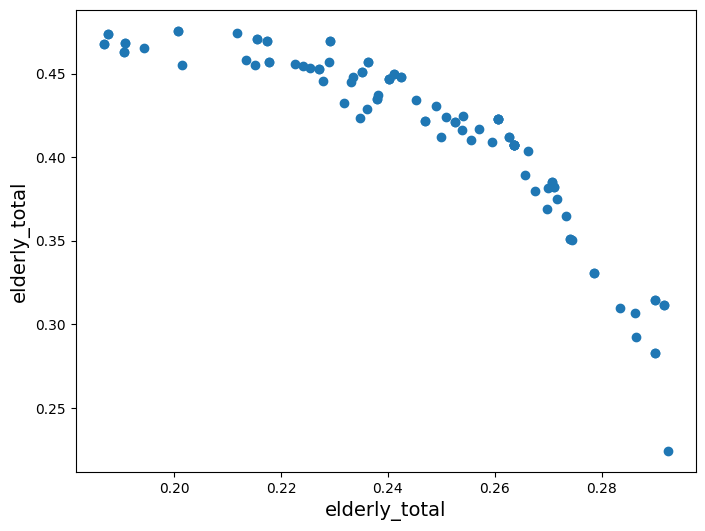

In [8]:
# plot fitness values for first two objectives
plt.figure(figsize=(8, 6))
plt.plot(result.total_coverage[:, 0], result.total_coverage[:, 1], "o")
plt.xlabel(objs.objectives[0].label, fontsize=14)
plt.ylabel(objs.objectives[0].label, fontsize=14)

## 3 Objectives: Workers, Children, Older Adults

In [9]:
objs = Objectives(
    la,
    [
        Column(elder.name, "total"),
        Column(child.name, "total"),
        Column(work.name, "workers"),
    ],
    cov,
)

In [10]:
algo = pg.nsga2(gen=1000)
opt = PyGMO(algo, population_size=100)
result = opt.run(objs, n_sensors)

  909          90800      -0.324176      -0.538691
    910          90900      -0.324176      -0.538691
    911          91000      -0.324176      -0.538691
    912          91100      -0.324176      -0.538691
    913          91200      -0.324176      -0.538691
    914          91300      -0.324176      -0.538691
    915          91400      -0.324176      -0.538691
    916          91500      -0.324176      -0.538691
    917          91600      -0.324176      -0.538691
    918          91700      -0.324176      -0.538691
    919          91800      -0.324176      -0.538691
    920          91900      -0.324176      -0.538691
    921          92000      -0.324176      -0.538691
    922          92100      -0.324176      -0.538691
    923          92200      -0.324176      -0.538691
    924          92300      -0.324176      -0.538691
    925          92400      -0.324176      -0.538691
    926          92500      -0.324176      -0.538691
    927          92600      -0.324176      -0.53

     65           6400       -0.31134      -0.337949       -0.45378
     66           6500       -0.31134      -0.337949       -0.45378
     67           6600       -0.31134      -0.337949       -0.45378
     68           6700       -0.31134      -0.337949       -0.45378
     69           6800       -0.31134      -0.337949       -0.45378
     70           6900       -0.31134      -0.337949       -0.45378
     71           7000       -0.31134      -0.337949       -0.45378
     72           7100       -0.31134      -0.337949      -0.463338
     73           7200       -0.31134      -0.337949      -0.463338
     74           7300       -0.31134      -0.337949      -0.463338
     75           7400       -0.31134      -0.337949      -0.463338
     76           7500       -0.31134      -0.337949      -0.463338
     77           7600       -0.31134      -0.337949      -0.463338
     78           7700      -0.312588      -0.337949      -0.463338
     79           7800      -0.312588      -0.33

    301          30000      -0.319115      -0.339269      -0.507546
    302          30100      -0.319115      -0.339269      -0.507546
    303          30200      -0.319115      -0.339269      -0.507546
    304          30300      -0.319115      -0.339269      -0.507546
    305          30400      -0.319115      -0.339269      -0.507546
    306          30500      -0.319115      -0.339269      -0.507546
    307          30600      -0.319115      -0.339269      -0.507546
    308          30700      -0.319115      -0.339269      -0.507546
    309          30800      -0.319115      -0.339269      -0.507546
    310          30900      -0.319115      -0.339269      -0.507546
    311          31000      -0.319115      -0.339269      -0.507546
    312          31100      -0.319115      -0.339269      -0.507546
    313          31200      -0.319115      -0.339269      -0.507546
    314          31300      -0.319115      -0.339269      -0.507546
    315          31400      -0.319115      -0.33

    538          53700      -0.321291      -0.346821      -0.527953
    539          53800      -0.321291      -0.346821      -0.527953
    540          53900      -0.321291      -0.346821      -0.527953
    541          54000      -0.321291      -0.346821      -0.527953
    542          54100      -0.321291      -0.346821      -0.527953
    543          54200      -0.321386      -0.346821      -0.529211
    544          54300      -0.321386      -0.346821      -0.529211
    545          54400      -0.321386      -0.346821      -0.529211
    546          54500      -0.321386      -0.346821      -0.529211
    547          54600      -0.321386      -0.346821      -0.529211
    548          54700      -0.321386      -0.346821      -0.529211
    549          54800      -0.321386      -0.346821      -0.529211
    550          54900      -0.321386      -0.346821      -0.529211

   Gen:        Fevals:        ideal1:        ideal2:        ideal3:
    551          55000      -0.321386      -0.3

In [11]:
print("Best fitness values for single objectives:")
for i in range(len(objs.objectives)):
    print(objs.objectives[i].label, result.best_coverage()[i])

Best fitness values for single objectives:
elderly_total 0.3228077357459034
children_total 0.3519281126698007
workplace_workers 0.5462509944663287


Text(0, 0.5, 'workplace_workers')

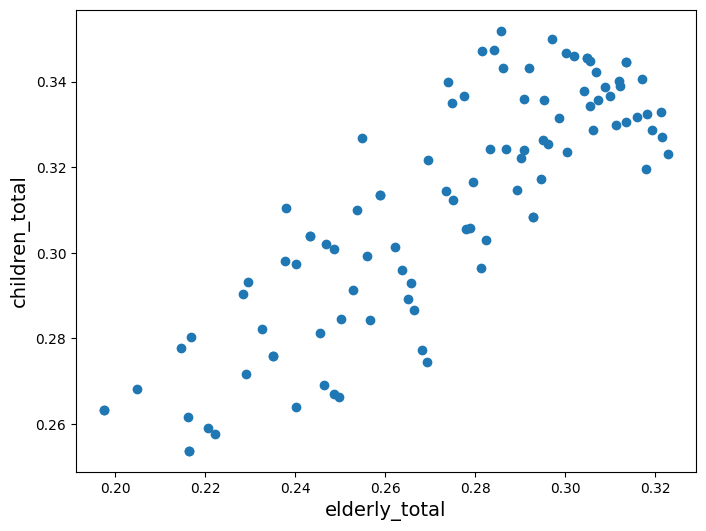

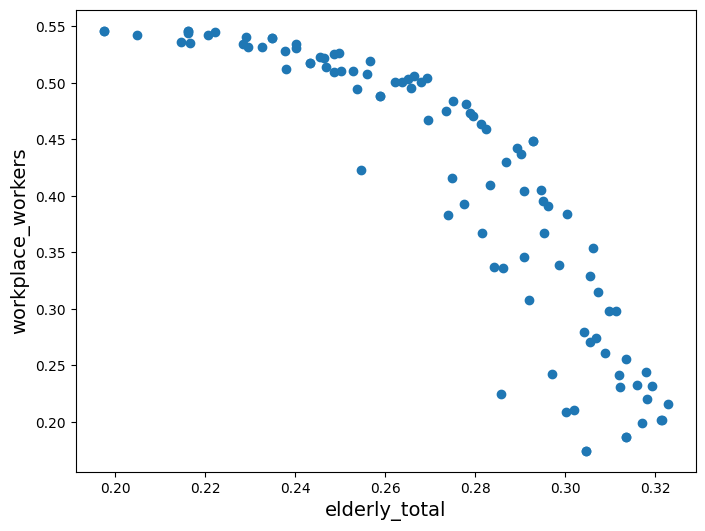

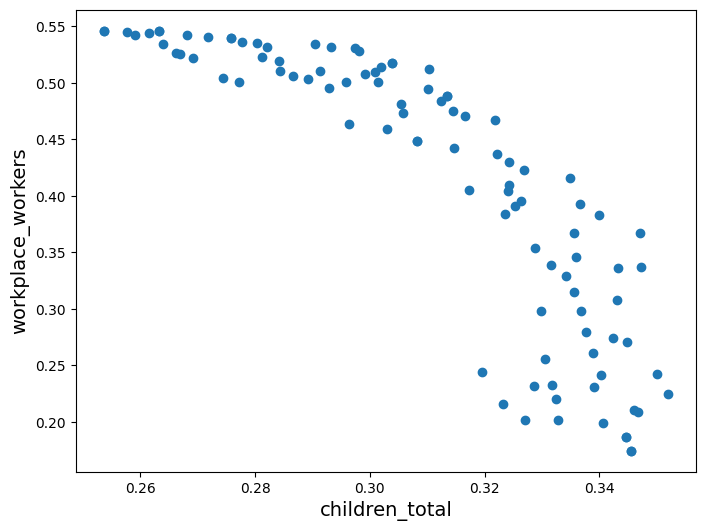

In [15]:
plt.figure(figsize=(8, 6))
plt.plot(result.total_coverage[:, 0], result.total_coverage[:, 1], "o")
plt.xlabel(objs.objectives[0].label, fontsize=14)
plt.ylabel(objs.objectives[1].label, fontsize=14)

plt.figure(figsize=(8, 6))
plt.plot(result.total_coverage[:, 0], result.total_coverage[:, 2], "o")
plt.xlabel(objs.objectives[0].label, fontsize=14)
plt.ylabel(objs.objectives[2].label, fontsize=14)

plt.figure(figsize=(8, 6))
plt.plot(result.total_coverage[:, 1], result.total_coverage[:, 2], "o")
plt.xlabel(objs.objectives[1].label, fontsize=14)
plt.ylabel(objs.objectives[2].label, fontsize=14)

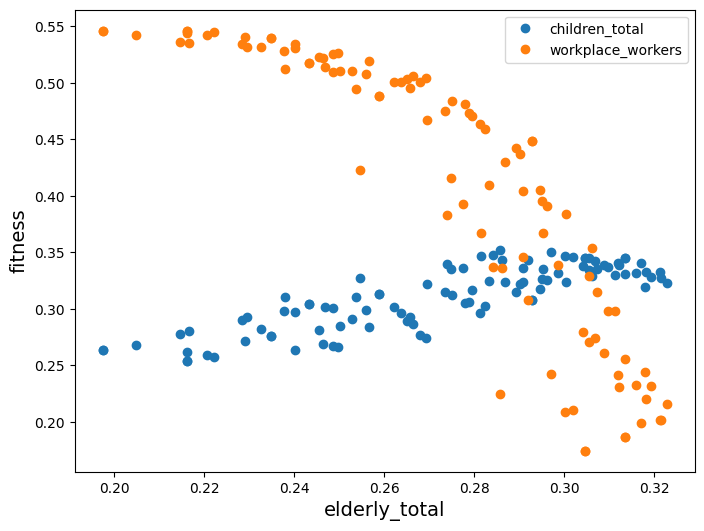

In [17]:
plt.figure(figsize=(8, 6))
plt.plot(
    result.total_coverage[:, 0],
    result.total_coverage[:, 1],
    "o",
    label=objs.objectives[1].label,
)
plt.plot(
    result.total_coverage[:, 0],
    result.total_coverage[:, 2],
    "o",
    label=objs.objectives[2].label,
)
plt.xlabel(objs.objectives[0].label, fontsize=14)
plt.ylabel("fitness", fontsize=14)
plt.legend()

<AxesSubplot:ylabel='Coverage'>

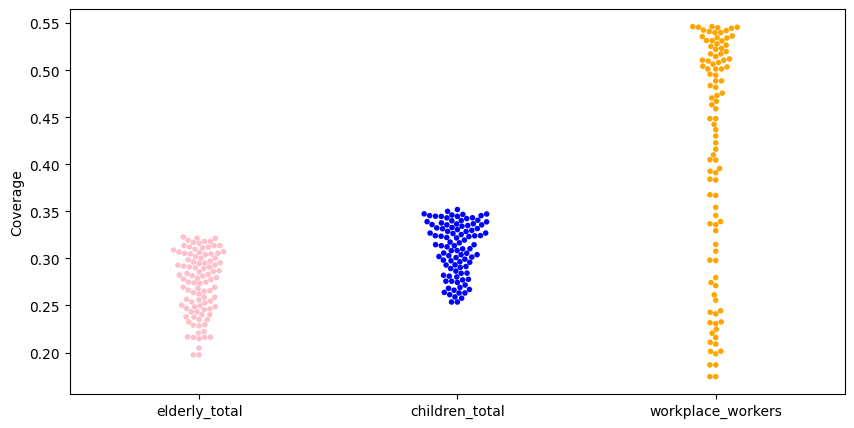

In [20]:
networks_swarmplot(result)

<AxesSubplot:ylabel='Coverage'>

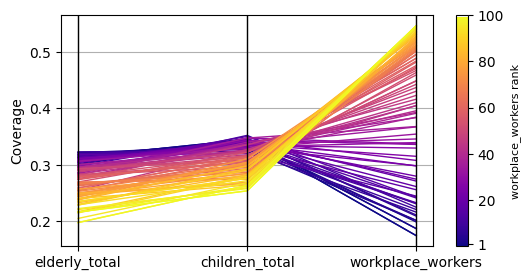

In [23]:
networks_parallel_coords_plot(result, color_by="workplace_workers")